## Diksha Srivastava
### Student id: 21235117

## Task 1

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

import keras
from keras import layers
from keras import regularizers

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import adam_v2 



In [11]:
# loading google drive
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = "gdrive/My Drive/"

Mounted at /content/gdrive


## Dataset

For the assignment, I have chosen Fashion mnist dataset. It consists images of various fashion products like shirts, bag, shoes etc.

This dataset consist of Zalando's article images. It consist of 60,000 training and 10,000 test set. Each image is a gray-scale image of 28*28 dimension. The images also have labels but we don't use it for this task. The pixel values lies in the range 0 to 255. 

### Steps to use dataset

1. Download the dataset from the URL:  https://www.kaggle.com/datasets/zalando-research/fashionmnist

2. The dataset has two CSV files, one for training set and the other for test set. The first column contains label which we discard. The other columns contain pixel value and hence contains 784 (28*28) columns.

3. We also plot 9 samples from the image dataset using matplotlib library.

### Application

New samples generated from Fashion dataset can be used in recommendation system on e-commerce platforms. Recommendation system allows for personalised user-experience. These system recommends pants, shirts, tops, and bags etc. according to user preference and also helps user to discover new items in their 'You may also like/people also like' section. Not only this, people also want to mix and match different categories of product according to their liking. Example, recommending a bag along with a dress. Hence, an interactive fashion product application which can utilise VAE/GAN produced latent space which has new samples similar to users interest/search history can be recommended to users. 

In [12]:
# reading dataset
X_train = pd.read_csv(data_dir + "fashion-mnist_train.csv")
X_test = pd.read_csv(data_dir + "fashion-mnist_test.csv")

In [13]:
# removing label column from dataset.
del X_train['label']
# converting train data to numpy array.
X_train = X_train.values

# removing labels from test set.
del X_test['label'] 
# converting test data to numpy array.  
X_test = X_test.values

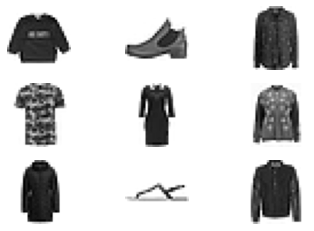

In [ ]:
def plot_images(X):
  ''' This function plots 9 images from the fashion-mnist dataset.'''
  # plot images
  for i in range(9):
    # creating a subplot of 9 images.
    plt.subplot(331 + i)
    # keeping the cmap and reverse gray.
    plt.imshow(X[i], cmap = plt.get_cmap('gray_r'))
    # removing the axis as we only need to see images.
    plt.axis('off')
  plt.show()

plot_images(X_train.reshape(60000, 28, 28))

In [14]:
# normalising the values in the range 0 to 1.
X_train_ae = X_train.astype('float32') / 255
X_test_ae = X_test.astype('float32') / 255
print(X_train_ae.shape)
print(X_test_ae.shape)

(60000, 784)
(10000, 784)


## Task 2

In order to keep a similar architecture in all three models, I have created layers in the following way:

1. Input layer of size 784.

2. Hidden layer of size 512 at both encoder and decoder.

3. Another hidden layer of size 256 at both encoder and decoder.

4. The latent space of size 100.

5. Learning rate of 0.0001.

6. Activation function is Leaky Relu.

## Auto encoder

In [ ]:
# This code is referred from https://blog.keras.io/building-autoencoders-in-keras.html 
# and layers added and LeakyRelu activation function used.

# compressing the image of size 784 to 100. 
encoding_dim = 100
hidden_size1 = 512
hidden_size2 = 256

# Input image.
input_img_ae = keras.Input(shape=(784,))

# encoder layers
# hidden layer 1
hidden_1 = layers.Dense(hidden_size1)(input_img_ae)
hidden_1 = layers.LeakyReLU(alpha=0.2)(hidden_1)
# hidden layer 2
hidden_2 = layers.Dense(hidden_size2)(hidden_1)
hidden_2 = layers.LeakyReLU(alpha=0.2)(hidden_2)
# encoded input image with l1 regularizer to avoid overfitting.
encoded_ae = layers.Dense(encoding_dim,
                           activity_regularizer=regularizers.l1(10e-5))(hidden_2)
encoded_ae = layers.LeakyReLU(alpha=0.2)(encoded_ae)

# decoded layers
# hidden layer 1 
hidden_3 = layers.Dense(hidden_size2)(encoded_ae)   
hidden_3 = layers.LeakyReLU(alpha=0.2)(hidden_3)
# hidden layer 2
hidden_4 = layers.Dense(hidden_size1)(hidden_3)   
hidden_4 = layers.LeakyReLU(alpha=0.2)(hidden_4)                  
# reconstructing the image back to size 784.
decoded_ae = layers.Dense(784, activation='sigmoid')(hidden_4)

# A model to map reconstructed image to input image.
autoencoder_ae = keras.Model(input_img_ae, decoded_ae)

autoencoder_ae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
                       loss='binary_crossentropy')

In [ ]:
autoencoder_ae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25700     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 100)               0     

In [ ]:
# training the model.
autoencoder_history = autoencoder_ae.fit(X_train_ae, X_train_ae,
                                         epochs=200,
                                         batch_size=256,
                                         shuffle=True,
                                         validation_data=(X_test_ae, X_test_ae))

Epoch 1/200
235/235 [==============================] - 11s 43ms/step - loss: 0.4465 - val_loss: 0.3582
Epoch 2/200
235/235 [==============================] - 9s 40ms/step - loss: 0.3372 - val_loss: 0.3239
Epoch 3/200
235/235 [==============================] - 9s 40ms/step - loss: 0.3192 - val_loss: 0.3135
Epoch 4/200
235/235 [==============================] - 9s 40ms/step - loss: 0.3114 - val_loss: 0.3075
Epoch 5/200
235/235 [==============================] - 11s 48ms/step - loss: 0.3064 - val_loss: 0.3032
Epoch 6/200
235/235 [==============================] - 9s 39ms/step - loss: 0.3026 - val_loss: 0.2998
Epoch 7/200
235/235 [==============================] - 9s 39ms/step - loss: 0.2995 - val_loss: 0.2973
Epoch 8/200
235/235 [==============================] - 9s 39ms/step - loss: 0.2966 - val_loss: 0.2943
Epoch 9/200
235/235 [==============================] - 9s 40ms/step - loss: 0.2942 - val_loss: 0.2920
Epoch 10/200
235/235 [==============================] - 9s 39ms/step - loss: 0.2

## Variational Auto encoder

In [4]:
# The code moving forward is referred from lecture notes and layers and LeakyRelu added.

# defining the dimension of layers.
original_dim = 784
intermediate_dim1 = 512
intermediate_dim2 = 256
# keeping the latent space dimension as 100.
# the more the dimension, the better the quality of images.
latent_dim = 100

class Sampling(layers.Layer):
    """This class uses mean and standard deviation to sample z value, which contains
    the vector encoding the fashion dataset."""
    def call(self, inputs):
        # overriding the call method.
        z_mean, z_log_var = inputs
        epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean)) 
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon 


In [5]:
# Definining encoder model.
# input -> hidden layer1 -> hidden layer2 -> (z_mean, z_log_var) -> (sampling) z
original_inputs = tf.keras.Input(shape=(original_dim,), name="encoder_input")

# hidden layer 1
hidden_vae_1 = layers.Dense(intermediate_dim1)(original_inputs)
hidden_vae_1 = layers.LeakyReLU(alpha=0.2)(hidden_vae_1)

# hidden layer 2
hidden_vae_2 = layers.Dense(intermediate_dim2)(hidden_vae_1)
hidden_vae_2 = layers.LeakyReLU(alpha=0.2)(hidden_vae_2)

# calculating mean and variance.
z_mean = layers.Dense(latent_dim, name="z_mean")(hidden_vae_2)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(hidden_vae_2)
# sampling some images.
z = Sampling()((z_mean, z_log_var))
# creating an encoder with input image as input and z as output.
encoder_vae = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")
encoder_vae.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          401920      ['encoder_input[0][0]']          
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 512)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 256)          131328      ['leaky_re_lu[0][0]']            
                                                                                            

In [6]:
# Defining decoder model.
# z -> hidden layer2 -> hidden layer1 -> output
latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")

# hidden layer 2
hidden_vae_2 = layers.Dense(intermediate_dim2)(latent_inputs)
hidden_vae_2 = layers.LeakyReLU(alpha=0.2)(hidden_vae_2)

# hidden layer 1
hidden_vae_1 = layers.Dense(intermediate_dim1)(hidden_vae_2)
hidden_vae_1 = layers.LeakyReLU(alpha=0.2)(hidden_vae_1)

# output layer having same dimension as input image.
outputs = layers.Dense(original_dim, activation="sigmoid")(hidden_vae_1)
decoder_vae = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")
decoder_vae.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               25856     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 784)               402192    
                                                                 
Total params: 559,632
Trainable params: 559,632
Non-trainab

In [7]:
# Definining vae model having input of dimension 784.
outputs = decoder_vae(z)
vae = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="vae")
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          401920      ['encoder_input[0][0]']          
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 512)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 256)          131328      ['leaky_re_lu[0][0]']            
                                                                                                

In [8]:
# calculating loss between original and output image.
reconstruction_loss = mse(original_inputs, outputs) 
reconstruction_loss = original_dim * K.mean(reconstruction_loss)
kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)

# setting the loss and kl divergence in the model.
vae.add_loss(kl_loss)
vae.add_metric(kl_loss, name='kl_loss', aggregation='mean')
vae.add_loss(reconstruction_loss)
vae.add_metric(reconstruction_loss, name='mse_loss', aggregation='mean')
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [9]:
vae.compile(optimizer)

In [15]:
# Training on the dataset.
vae_history = vae.fit(X_train_ae, X_train_ae, epochs=200, batch_size = 256, validation_data = (X_test_ae, X_test_ae))

Epoch 1/200
235/235 [==============================] - 13s 49ms/step - loss: 26.0601 - kl_loss: 1.0806 - mse_loss: 24.9795 - val_loss: 15.9880 - val_kl_loss: 1.2482 - val_mse_loss: 14.7398
Epoch 2/200
235/235 [==============================] - 11s 48ms/step - loss: 14.1363 - kl_loss: 1.3093 - mse_loss: 12.8269 - val_loss: 12.7587 - val_kl_loss: 1.3771 - val_mse_loss: 11.3815
Epoch 3/200
235/235 [==============================] - 11s 47ms/step - loss: 11.8443 - kl_loss: 1.3829 - mse_loss: 10.4614 - val_loss: 11.1341 - val_kl_loss: 1.4091 - val_mse_loss: 9.7250
Epoch 4/200
235/235 [==============================] - 11s 47ms/step - loss: 10.5713 - kl_loss: 1.4170 - mse_loss: 9.1543 - val_loss: 10.4052 - val_kl_loss: 1.4560 - val_mse_loss: 8.9492
Epoch 5/200
235/235 [==============================] - 11s 47ms/step - loss: 9.7968 - kl_loss: 1.4269 - mse_loss: 8.3698 - val_loss: 9.5597 - val_kl_loss: 1.4476 - val_mse_loss: 8.1121
Epoch 6/200
235/235 [==============================] - 12s 51m

## Generative Adversarial Model

In [ ]:
# The code moving forward is referred from lecture notes with changes in layers.

# Defining the dimension of input image and latent layer.
img_shape = (28 * 28,)
# the more the intermediate dimension, the more clear the image is.
z_dim = 100

# Defining generator model (like AE decoder)
# z -> hidden layer -> image
Generator = Sequential()
Generator.add(Input(shape=(z_dim,)))
# Layer 1
Generator.add(Dense(256))
Generator.add(LeakyReLU(alpha=0.2))
Generator.add(BatchNormalization(momentum=0.8))
# Layer 2
Generator.add(Dense(512))
Generator.add(LeakyReLU(alpha=0.2))
Generator.add(BatchNormalization(momentum=0.8))

# output image layer.
Generator.add(Dense(np.prod(img_shape), activation="tanh"))
Generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [ ]:
# Definining discriminator model
# image -> hidden layer -> class 0 or 1 (real or fake)
Discriminator = Sequential()
Discriminator.add(Input(shape=(img_shape)))
# Layer 1
Discriminator.add(Dense(512))
Discriminator.add(LeakyReLU(alpha=0.2))
# Layer 2
Discriminator.add(Dense(256))
Discriminator.add(LeakyReLU(alpha=0.2))
# classifying image as real or fake using this layer.
Discriminator.add(Dense(1, activation='sigmoid')) # binary classification
Discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# using adam optimizer with 0.0001 learning rate.
Discriminator.compile(loss='mse', optimizer=adam_v2.Adam(0.0001, 0.5),
          metrics=['accuracy'])

# making the discriminator not trainable.
Discriminator.trainable = False
z = Input(shape=(z_dim,))
# creating a GAN model using generator and discriminator.
# the images generated from generator are classified using discriminator.
GAN = Model(z, Discriminator(Generator(z)))
GAN.compile(loss='mse', optimizer=adam_v2.Adam(0.0001, 0.5),
          metrics=['accuracy'])
GAN.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               562704    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 533505    
                                                                 
Total params: 1,096,209
Trainable params: 561,168
Non-trainable params: 535,041
_________________________________________________________________


In [ ]:
# since we are using tanh, thus the range of values should be between -1 to 1. 
X_train_gan = X_train / 127.5 - 1
# calculating the number of iterations.
batch_size=100
epochs = 100
steps = epochs * X_train_gan.shape[0] // batch_size
sample_interval=100
# fake -> 1, real -> 0
y_fake = np.ones((batch_size, 1))
y_real = np.zeros((batch_size, 1))

def sample_images():
    # saving image to see some images generated
    r, c = 3, 3
    z = np.random.normal(0, 1, (r * c, z_dim))
    x_fake = Generator.predict(z)

    # creating a 3*3 grid.
    fig, axs = plt.subplots(r, c)
    for i in range(r):
        for j in range(c):
          # setting an image in the grid.
            axs[i, j].imshow(x_fake[i*r+j].reshape((28, 28)), cmap='gray_r')
            axs[i, j].axis('off')
    plt.savefig("gan_mnist.png")
    plt.close()

In [ ]:
# for each step generating images.
for step in range(steps):

    # choose real images to generate fake images.
    idx = np.random.randint(0, X_train_gan.shape[0], batch_size)
    x_real = X_train_gan[idx]
    z = np.random.normal(0, 1, (batch_size, z_dim))
    x_fake = Generator.predict(z)

    # train Discriminator on real and fake images.
    loss_d_real = Discriminator.train_on_batch(x_real, y_real)
    loss_d_fake = Discriminator.train_on_batch(x_fake, y_fake)
    loss_d = 0.5 * np.add(loss_d_real, loss_d_fake)

    # train generator.
    loss_g = GAN.train_on_batch(z, y_real)

    # loss_g and loss_d are loss and accuracy.
    print(f"{step:4d}/{steps} [D {loss_d[0]:.2f}, acc. (on x_real and x_fake) {100 * loss_d[1]:3.0f}] [G {loss_g[0]:.2f}, acc. (on x_fake) {100 * loss_g[1]:3.0f}]")
    if step % sample_interval == 0 or step == steps - 1:
      # storing every 100th image.
      sample_images()
     




Streaming output truncated to the last 5000 lines.
55000/60000 [D 0.16, acc. (on x_real and x_fake)  79] [G 0.50, acc. (on x_fake)   6]
55001/60000 [D 0.19, acc. (on x_real and x_fake)  71] [G 0.47, acc. (on x_fake)   9]
55002/60000 [D 0.19, acc. (on x_real and x_fake)  69] [G 0.46, acc. (on x_fake)  12]
55003/60000 [D 0.19, acc. (on x_real and x_fake)  70] [G 0.48, acc. (on x_fake)   8]
55004/60000 [D 0.18, acc. (on x_real and x_fake)  74] [G 0.47, acc. (on x_fake)  10]
55005/60000 [D 0.17, acc. (on x_real and x_fake)  76] [G 0.47, acc. (on x_fake)   7]
55006/60000 [D 0.19, acc. (on x_real and x_fake)  76] [G 0.48, acc. (on x_fake)   8]
55007/60000 [D 0.18, acc. (on x_real and x_fake)  73] [G 0.49, acc. (on x_fake)  14]
55008/60000 [D 0.17, acc. (on x_real and x_fake)  78] [G 0.49, acc. (on x_fake)   8]
55009/60000 [D 0.17, acc. (on x_real and x_fake)  77] [G 0.47, acc. (on x_fake)   6]
55010/60000 [D 0.17, acc. (on x_real and x_fake)  75] [G 0.46, acc. (on x_fake)   9]
55011/60000 [D

## Task 3

## Auto-encoder

Auto-encoders are unsupervised deep learning approach which learns to compress the input and then regenerate the data with the original dimension. It is mainly used for dimensionality reduction and performs better than PCA (Principal Component Analysis). A basic auto-encoder has mainly 3 layers:

1. Encoder: It takes an input image and compresses it to a latent space representation.

2. Bottleneck: It represents the compressed input to be passed further in the layer.

3. Decoder: It generates the input image again from the compressed image. The image generated will not be exactly same as input image but it will closely represent the input image.

It can be used for anomaly detection, denoising images, and further more.

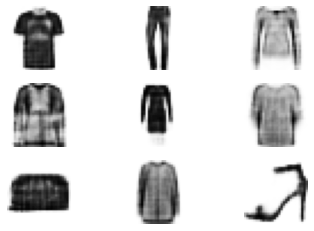

In [ ]:
# sample decompressed images generated from Auto-encoder.
# get decoded image on test set.
decoded_imgs = autoencoder_ae.predict(X_test_ae)
plot_images(decoded_imgs.reshape(10000, 28, 28))

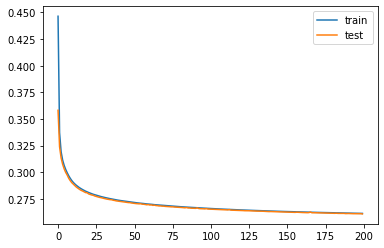

In [ ]:
# plot loss of AE.
plt.plot(autoencoder_history.history['loss'], label='train')
plt.plot(autoencoder_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Result: AE

It can be seen that the image generated after performing Auto-encoding is similar to the original image but it is blur. The edges of the clothes/bags etc. are not clearly visible. Also, the input image has some patterns on t-shirt/shirt but that is not visible after auto-encoding. 

The loss curve shows that there was no overfitting as we used l1-regualiser as well to prevent it. It also shows that the reconstruction loss decreased over epochs which is a good sign as the output image would be similar to the input image and would not vary much.

## VAE

A variational auto-encoder can be used to generate a new image as it generates a latent space with similar images. It has a similar architecture as that of an Auto-encoder. It consists of an encoder and a decoder which minimises the reconstruction error. However, we encode it here to a distribution. Thus, the input is encoded as a distribution, then sampling is done over the latent space, then the decoder layer tries to reduce reconstruction error and backpropagates. The loss function apart from reconstruction error also contains regularisation term. Kulback-Leibler divergence is used to regularise the latent space by making sure the images encoded lie in the normal distribution and does not become overfit. 

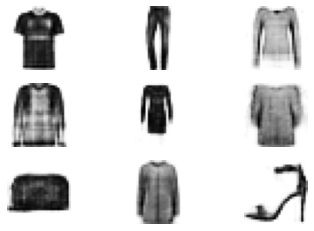

In [ ]:
# sample image generated from VAE.
# encode and decode some data taken from the test set.
encoded_imgs_vae = encoder_vae.predict(X_test_ae)
decoded_imgs_vae = decoder_vae.predict(encoded_imgs_vae)
plot_images(decoded_imgs_vae.reshape(10000, 28, 28))

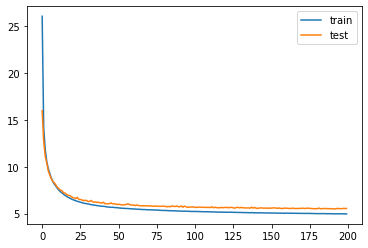

In [16]:
# plot loss of VAE.
plt.plot(vae_history.history['loss'], label='train')
plt.plot(vae_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Result: VAE

It is observed that the output image generated is similar to the input image but is blurry. However, it is more clear than an Auto-encoder but still the edges are not sharp. The patterns on clothes are somewhat visible but still not that clear. Also in comparison to AE, the image is slightly light while AE has more dark color which makes the patterns on clothes invisible.

The loss curve shows that the reconstruction loss decreased over epochs which is a good thing as the new image does not lie far from the original image.

A smooth latent space is generated which was not the case in auto-encoder. It is generated with the help of distribution, mean and standard deviation which ensures that the image generated is similar to the input image but deviates to some extent when required to generate some new features in the latent space.

## GAN

A generative adversarial network has a generative model and a discriminator model. The generative model generates images and tries to fool the discriminator model. Discriminator model classifies the image as real or fake. If the image is fake then generator will create a new image and if the discriminator classifies it as real image then the image is similar to input image.

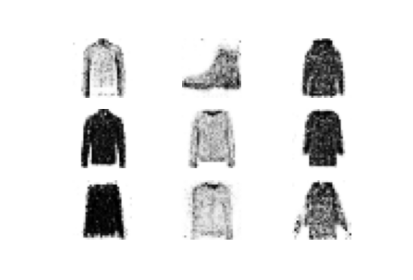

In [ ]:
# loading the sample image generated from GAN.
img = mpimg.imread('gan_mnist.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

### Result: GAN

The images generated from GAN looks reasonable. Even though the quality of image is not the same as that of the input, but the image is closely similar to the input image. It performed better than the other two models in the sense that the edges are visible and is not a blur. With more iterations, the image could have been more similar to the reality. However, in comparison to other models it is more creative and real-looking. Some patterns on shirt are also visible.

### Discussion on performance of models

We can see that images generated from GAN are more real-world like in comparison to others. Next VAE performed better than AE. We also know that GAN and VAE are the only generative algorithms which are capable of learning new features and generating new images. However, AE only does dimensionality reduction and does not generate any new images. 

The performance of VAE was better than AE in terms of image quality because instead of simply compressing the image, VAE learnt the input image characteristics. This could be the size of product whether it's a bad or shoes or shirt, is it long-sleeve or short-sleeve etc. This is done by using mean and standard deviation. For each feature like shirts/tops etc. a probability distribution is created which learns how likely a feature's value like shirt's sleeve length is. Thus, the new samples generated mixes these values and does not lie far from the original image.

The performance of GAN was even better than VAE because it generated real-like images and is based on a generator-discriminator model. The discriminator acts as a supervised model which learns real and fake images during training. The task of generator is to fool the discriminator and in order to do so it generates more real-like images. Hence, the image generated by GAN are more close to input image. This discriminator model is not present in any other model, thus the images are not real-world like. 


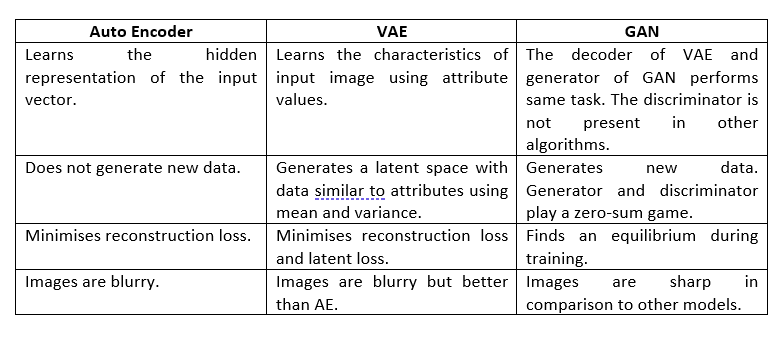